<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/CCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Canonical Correlation Analysis (CCA)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.decomposition import PCA

# #############################################################################
# Dataset based latent variables model

n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))

X_train = X[:n // 2]
Y_train = Y[:n // 2]
X_test = X[n // 2:]
Y_test = Y[n // 2:]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

Corr(X)
[[ 1.    0.51 -0.03 -0.04]
 [ 0.51  1.   -0.03  0.03]
 [-0.03 -0.03  1.    0.49]
 [-0.04  0.03  0.49  1.  ]]
Corr(Y)
[[ 1.    0.55  0.04 -0.03]
 [ 0.55  1.    0.09  0.02]
 [ 0.04  0.09  1.    0.5 ]
 [-0.03  0.02  0.5   1.  ]]


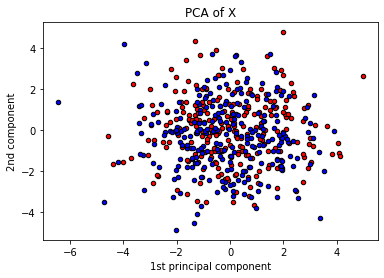

In [2]:
# PCA of X

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#print(X_train_pca)

# Plot PCA of X

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c="blue",
            s=20, edgecolor='k')
plt.title("PCA of X")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")
plt.savefig("cca_data_pca_x.png")
plt.show()

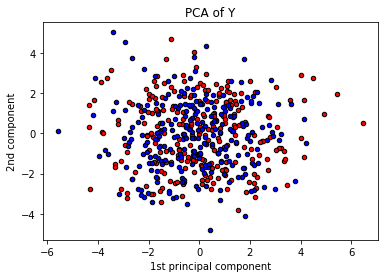

In [3]:
# PCA of Y

pca = PCA()
Y_train_pca = pca.fit_transform(Y_train)
Y_test_pca = pca.transform(Y_test)


# Plot PCA of Y

plt.scatter(Y_train_pca[:,0], Y_train_pca[:,1], c="red",
            s=20, edgecolor='k')
plt.scatter(Y_test_pca[:,0], Y_test_pca[:,1], c="blue",
            s=20, edgecolor='k')
plt.title("PCA of Y")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")
plt.savefig("cca_data_pca_y.png")
plt.show()

In [7]:
# Canonical Correlation Analysis (CCA)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

print('the coefficient of determination R^2 =', cca.score(X_train, Y_train))

the coefficient of determination R^2 = 0.28489173610271923


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


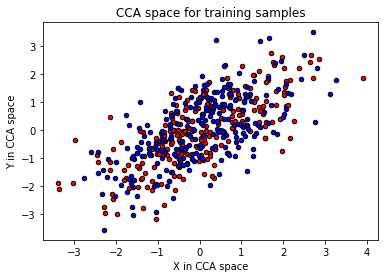

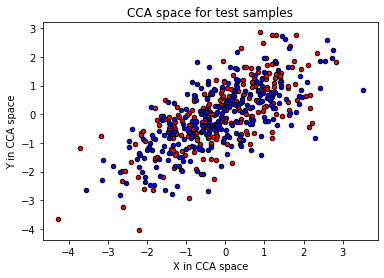

In [5]:
# Plot of Transformed Space

plt.scatter(X_train_r[:,0], Y_train_r[:,0], c="red",
            s=20, edgecolor='k')
plt.scatter(X_train_r[:,1], Y_train_r[:,1], c="blue",
            s=20, edgecolor='k')
plt.title("CCA space for training samples")
plt.xlabel("X in CCA space")
plt.ylabel("Y in CCA space")
plt.savefig("cca_plot_train.png")
plt.show()

plt.scatter(X_test_r[:,0], Y_test_r[:,0], c="red",
            s=20, edgecolor='k')
plt.scatter(X_test_r[:,1], Y_test_r[:,1], c="blue",
            s=20, edgecolor='k')
plt.title("CCA space for test samples")
plt.xlabel("X in CCA space")
plt.ylabel("Y in CCA space")
plt.savefig("cca_plot_test.png")
plt.show()